In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
sales=pd.read_csv(r"C:\Users\HP SMART\Desktop\training_data.csv")

In [3]:
sales.head()

,Row_ID,Application,Device,Launch_Year,Domain,Developer_comapny,Indian_Sales,China_Sales,Korea_Sales,Other_Sales,Global_Sales,ScorebyCritic,No_ofCritics,ScorebyUser,No_ofUsers,Developer,Overall_Rating
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
sales.describe()

,Row_ID,Launch_Year,Indian_Sales,China_Sales,Korea_Sales,Other_Sales,Global_Sales,ScorebyCritic,No_ofCritics,No_ofUsers
count,14748.00000,14517.000000,14748.000000,14748.000000,14748.000000,14748.000000,14748.000000,7526.000000,7526.000000,7047.000000
mean,7373.50000,2006.217676,0.273585,0.149364,0.079891,0.048842,0.551876,69.181637,26.830853,161.749255
std,4257.52522,5.944182,0.728272,0.456193,0.286014,0.159235,1.372658,13.833710,19.094734,555.912492
min,0.00000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.020000,13.000000,3.000000,4.000000
25%,3686.75000,2003.000000,0.020000,0.000000,0.000000,0.000000,0.080000,61.000000,12.000000,10.000000
50%,7373.50000,2007.000000,0.090000,0.030000,0.000000,0.010000,0.200000,71.000000,22.000000,24.000000
75%,11060.25000,2010.000000,0.260000,0.120000,0.050000,0.040000,0.510000,80.000000,37.000000,82.000000
max,14747.00000,2020.000000,41.360000,28.960000,10.220000,8.450000,82.530000,98.000000,113.000000,10665.000000


In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14748 entries, 0 to 14747
Data columns (total 17 columns):
Row_ID               14748 non-null int64
Application          14746 non-null object
Device               14748 non-null object
Launch_Year          14517 non-null float64
Domain               14746 non-null object
Developer_comapny    14707 non-null object
Indian_Sales         14748 non-null float64
China_Sales          14748 non-null float64
Korea_Sales          14748 non-null float64
Other_Sales          14748 non-null float64
Global_Sales         14748 non-null float64
ScorebyCritic        7526 non-null float64
No_ofCritics         7526 non-null float64
ScorebyUser          9166 non-null object
No_ofUsers           7047 non-null float64
Developer            9226 non-null object
Overall_Rating       9118 non-null object
dtypes: float64(9), int64(1), object(7)
memory usage: 1.9+ MB


In [6]:
sales.isnull().sum()

Row_ID                  0
Application             2
Device                  0
Launch_Year           231
Domain                  2
Developer_comapny      41
Indian_Sales            0
China_Sales             0
Korea_Sales             0
Other_Sales             0
Global_Sales            0
ScorebyCritic        7222
No_ofCritics         7222
ScorebyUser          5582
No_ofUsers           7701
Developer            5522
Overall_Rating       5630
dtype: int64

In [7]:
sales.Overall_Rating.value_counts()

E       3643
T       2710
M       1443
E10+    1309
EC         8
RP         2
K-A        2
AO         1
Name: Overall_Rating, dtype: int64

In [8]:
sales.Launch_Year=sales.Launch_Year.fillna(2009)
sales.Developer_comapny=sales.Developer_comapny.fillna('Electronic Arts')
sales.ScorebyCritic=sales.ScorebyCritic.fillna(sales.ScorebyCritic.median())
sales.No_ofCritics=sales.No_ofCritics.fillna(sales.No_ofCritics.median())
sales.No_ofUsers=sales.No_ofUsers.fillna(sales.No_ofUsers.median())
sales.ScorebyUser=sales.ScorebyUser.fillna('tbd')
sales.Developer=sales.Developer.fillna('Ubisoft')
sales.Overall_Rating=sales.Overall_Rating.fillna('E')
sales.Application=sales.Application.fillna('Need for Speed: Most Wanted')
sales.Domain=sales.Domain.fillna('Action')

In [9]:
sales.ScorebyUser.replace({'tbd':8},inplace=True)

In [10]:
sales.ScorebyUser=sales.ScorebyUser.astype('float')

In [11]:
sales=sales.drop(['Row_ID'],axis=1)

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [13]:
sales[sales.select_dtypes(include=['object']).columns]=sales[sales.select_dtypes(include=['object']).columns].apply(le.fit_transform)

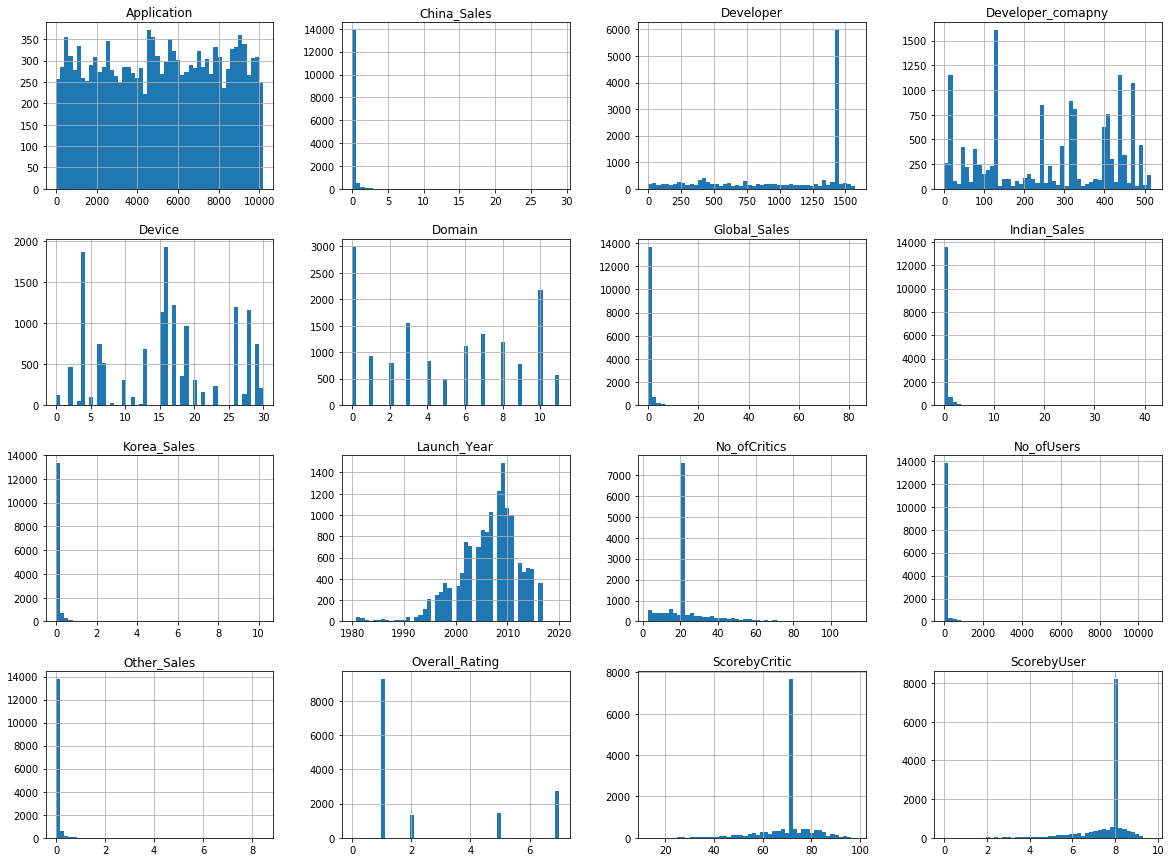

In [14]:
sales.hist(bins=50,figsize=(20,15))
plt.show()

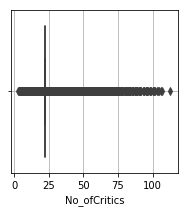

In [15]:
fig=plt.figure(figsize=(3,3))
sns.boxplot(sales.No_ofCritics)
plt.grid()

In [16]:
corr_matrix=sales.corr()

In [17]:
corr_matrix['Global_Sales'].sort_values(ascending=False)

Global_Sales         1.000000
Indian_Sales         0.939385
China_Sales          0.893691
Other_Sales          0.759836
Korea_Sales          0.559442
No_ofCritics         0.259296
No_ofUsers           0.219658
ScorebyCritic        0.202694
Device               0.033185
Overall_Rating       0.032120
ScorebyUser          0.029060
Domain               0.019293
Application          0.019034
Developer_comapny    0.010894
Developer           -0.013791
Launch_Year         -0.069414
Name: Global_Sales, dtype: float64

In [18]:
sales1_x=sales.loc[:,sales.columns!='Global_Sales']
sales1_y=sales.loc[:,sales.columns=='Global_Sales']

In [19]:
test=pd.read_csv(r"C:\Users\HP SMART\Desktop\test_data.csv")

In [20]:
test.head()

,Row_ID,Application,Device,Launch_Year,Domain,Developer_comapny,Indian_Sales,China_Sales,Korea_Sales,Other_Sales,ScorebyCritic,No_ofCritics,ScorebyUser,No_ofUsers,Developer,Overall_Rating
0,0,ZooCube,GC,2002.0,Puzzle,Acclaim Entertainment,0.02,0.00,0.00,0.0,67.0,15.0,6.1,7.0,PuzzleKings,E
1,1,GRID Autosport,PC,2014.0,Racing,Codemasters,0.00,0.02,0.00,0.0,78.0,35.0,6.2,257.0,Codemasters,E
2,2,Spy Hunter / Super Sprint,GBA,2005.0,Racing,Zoo Digital Publishing,0.02,0.01,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Demon Gaze 2,PSV,2014.0,Role-Playing,Experience Inc.,0.00,0.00,0.02,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Clover no Kuni no Alice: Wonderful Wonder World,PS2,2010.0,Adventure,Prototype,0.00,0.00,0.02,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
test.isnull().sum()

Row_ID                  0
Application             0
Device                  0
Launch_Year            38
Domain                  0
Developer_comapny      13
Indian_Sales            0
China_Sales             0
Korea_Sales             0
Other_Sales             0
ScorebyCritic        1377
No_ofCritics         1377
ScorebyUser          1138
No_ofUsers           1444
Developer            1117
Overall_Rating       1155
dtype: int64

In [22]:
test.No_ofUsers.value_counts()

5.0       39
4.0       32
8.0       21
6.0       20
7.0       18
9.0       16
12.0      14
11.0      14
10.0      13
14.0      11
18.0       9
19.0       9
29.0       9
20.0       9
22.0       9
15.0       8
25.0       7
52.0       7
39.0       7
13.0       7
31.0       6
38.0       6
21.0       6
16.0       6
23.0       6
44.0       5
46.0       5
42.0       5
49.0       4
55.0       4
          ..
185.0      1
5234.0     1
539.0      1
295.0      1
922.0      1
4052.0     1
1454.0     1
594.0      1
942.0      1
389.0      1
284.0      1
99.0       1
490.0      1
73.0       1
1016.0     1
2256.0     1
186.0      1
134.0      1
223.0      1
91.0       1
366.0      1
95.0       1
439.0      1
79.0       1
81.0       1
565.0      1
1847.0     1
1662.0     1
2698.0     1
1069.0     1
Name: No_ofUsers, Length: 202, dtype: int64

In [23]:
test.Launch_Year=test.Launch_Year.fillna(2008)
test.Developer_comapny=test.Developer_comapny.fillna('Namco Bandai Games')
test.ScorebyCritic=test.ScorebyCritic.fillna(test.ScorebyCritic.median())
test.No_ofCritics=test.No_ofCritics.fillna(test.No_ofCritics.median())
test.No_ofUsers=test.No_ofUsers.fillna(test.No_ofUsers.median())
test.ScorebyUser=test.ScorebyUser.fillna('tbd')
test.Developer=test.Developer.fillna('Konami')
test.Overall_Rating=test.Overall_Rating.fillna('E')

In [24]:
test.ScorebyUser.replace({'tbd':8},inplace=True)

In [25]:
test.ScorebyUser=test.ScorebyUser.astype('float')

In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018 entries, 0 to 2017
Data columns (total 16 columns):
Row_ID               2018 non-null int64
Application          2018 non-null object
Device               2018 non-null object
Launch_Year          2018 non-null float64
Domain               2018 non-null object
Developer_comapny    2018 non-null object
Indian_Sales         2018 non-null float64
China_Sales          2018 non-null float64
Korea_Sales          2018 non-null float64
Other_Sales          2018 non-null float64
ScorebyCritic        2018 non-null float64
No_ofCritics         2018 non-null float64
ScorebyUser          2018 non-null float64
No_ofUsers           2018 non-null float64
Developer            2018 non-null object
Overall_Rating       2018 non-null object
dtypes: float64(9), int64(1), object(6)
memory usage: 252.3+ KB


In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
test[test.select_dtypes(include=['object']).columns]=test[test.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [28]:
test.head()

,Row_ID,Application,Device,Launch_Year,Domain,Developer_comapny,Indian_Sales,China_Sales,Korea_Sales,Other_Sales,ScorebyCritic,No_ofCritics,ScorebyUser,No_ofUsers,Developer,Overall_Rating
0,0,1901,7,2002.0,5,9,0.02,0.00,0.00,0.0,67.0,15.0,6.1,7.0,388,0
1,1,526,12,2014.0,6,54,0.00,0.02,0.00,0.0,78.0,35.0,6.2,257.0,108,0
2,2,1486,6,2005.0,6,315,0.02,0.01,0.00,0.0,69.0,16.0,8.0,27.0,275,0
3,3,321,18,2014.0,7,92,0.00,0.00,0.02,0.0,69.0,16.0,8.0,27.0,275,0
4,4,240,14,2010.0,1,236,0.00,0.00,0.02,0.0,69.0,16.0,8.0,27.0,275,0


In [29]:
test_x=test.loc[:,test.columns!='Row_ID']

In [30]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [31]:
reg.fit(sales1_x,sales1_y)

LinearRegression()

In [32]:
pred_value = reg.predict(test_x)
pred_value

array([[0.02047209],
       [0.02017933],
       [0.03025439],
       ...,
       [0.1302857 ],
       [0.1302091 ],
       [0.13019267]])

In [33]:
df=pd.DataFrame(pred_value)
df

,0
0,0.020472
1,0.020179
2,0.030254
3,0.020266
4,0.020251
5,0.020313
6,0.030338
7,0.020363
8,0.020201
9,0.020342


In [34]:
final_df = pd.concat([test.Row_ID, df], axis =1)
final_df

,Row_ID,0
0,0,0.020472
1,1,0.020179
2,2,0.030254
3,3,0.020266
4,4,0.020251
5,5,0.020313
6,6,0.030338
7,7,0.020363
8,8,0.020201
9,9,0.020342


In [35]:
final_df.rename(columns = {0 : "Global_Sales"}, inplace = True)
final_df

,Row_ID,Global_Sales
0,0,0.020472
1,1,0.020179
2,2,0.030254
3,3,0.020266
4,4,0.020251
5,5,0.020313
6,6,0.030338
7,7,0.020363
8,8,0.020201
9,9,0.020342


In [36]:
final_df.to_csv(r'D:\submission.csv',index=False)